In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import ast
import progressbar
import os

In [8]:
actors = pd.read_pickle("./data/actors.pkl")
movies = pd.read_pickle("./data/movies.pkl").set_index('IMDb_ID')

In [23]:
tmp = actors.droplevel(0, axis=1).merge(movies['averageRating'],left_on='IMDb_ID', right_index=True)
tmp['ReleaseYearRange'] = (f['Movie release date'] // 10) * 10

median_rating = tmp['averageRating'].median()
high = tmp.query('averageRating >= @median_rating')
low = tmp.query('averageRating < @median_rating')

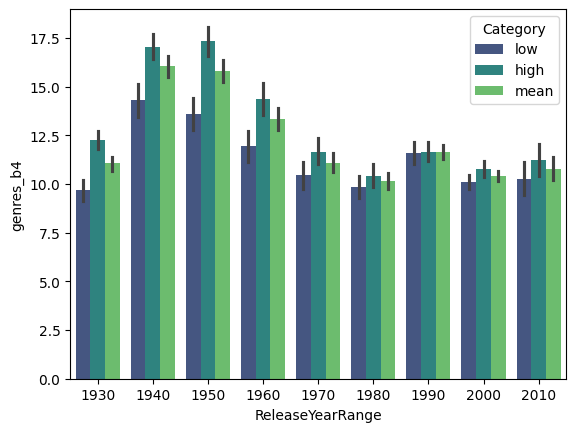

In [24]:
def do_fancy_ecpi_cute_plot(df, cat, diff, x, y):
    lo = df.query(f'{diff} < @{cat}').copy()
    hi = df.query(f'{diff} >= @{cat}').copy()
    me = df.copy()
    
    lo.loc[:, 'Category'] = 'low'
    hi.loc[:, 'Category'] = 'high'
    me.loc[:, 'Category'] = 'mean'
    
    frame = pd.concat([lo, hi, me])

    sns.barplot(data=frame, x=x, y=y, hue='Category', errorbar='ci', palette='viridis')
    plt.show()

do_fancy_ecpi_cute_plot(tmp, 'median_rating', 'averageRating', 'ReleaseYearRange', 'genres_b4')